In [26]:
import pandas as pd


In [27]:
df=pd.read_csv('/content/50_Startups.csv')

In [28]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [29]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [30]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [31]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['State']=le.fit_transform(df['State'])

In [33]:
x=df[['R&D Spend','Administration','Marketing Spend','State']]
y=df['Profit']

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30, 4)
(30,)
(20, 4)
(20,)


<Axes: >

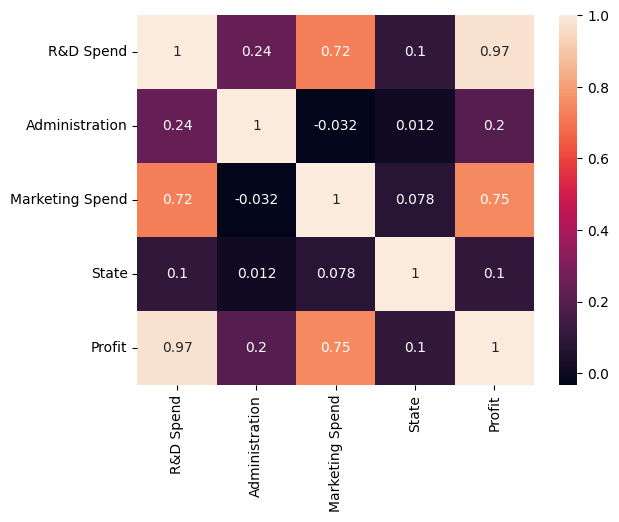

In [35]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [36]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)


LinearRegression()

In [37]:
print(LR.intercept_)

61716.4535979656


In [38]:
print(LR.coef_)

[ 8.24131919e-01 -1.27023399e-01  1.99003721e-02  5.51347716e+02]


In [39]:
LR.score(x_train,y_train)

0.9399137819980334

In [40]:
ypred = LR.predict(x_test)
print(ypred)

[185323.65798299  94027.63422524 129247.2248381  113032.02325923
 166045.38401047 157610.19276283  44514.0659034   84141.79409644
  56693.27894911 155625.11504275 174352.77356544  95853.9005239
  47911.01827802 128423.14408998 110555.67069228  86435.63648656
 125347.40025916  71926.64200863 100483.82820045  95442.7060678 ]


In [41]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test,ypred)
rmse = np.sqrt(mean_squared_error(y_test,ypred))
print(r2)
rmse

0.9544006866406677


8931.1982416254

In [42]:
#Lasso regression model
from sklearn.linear_model import Ridge, RidgeCV, Lasso
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)


Lasso Model............................................



In [43]:
test_score_ls

0.954437188439965

In [44]:
train_score_ls

0.9399136750107654

In [45]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(x_train,y_train)
#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)
print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.9398983524259654
The test score for ridge model is 0.9548232791026804
